## Read Data

In [4]:
from sklearn.externals import joblib
(tf_kp_posts,tf_kp_posts_feature_names, kp_sum_posts_clean_seg, tf_kp_comments,tf_kp_comments_feature_names, kp_sum_comments_clean_seg) = joblib.load( "result/tf_idf_kp_all.pkl" )
(tf_yao_posts,tf_yao_posts_feature_names, yao_sum_posts_clean_seg, tf_yao_comments,tf_yao_comments_feature_names, yao_sum_comments_clean_seg) = joblib.load( "result/tf_idf_yao_all.pkl" )

## SVD-based initialisation

In [5]:
k = 20
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
kp_W = model.fit_transform(tf_kp_posts)
kp_H = model.components_

yao_W = model.fit_transform(tf_yao_posts)
yao_H = model.components_

## Topic Descriptors

In [7]:
import numpy as np
def get_descriptor( tf_feature_names, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( tf_feature_names[term_index] )
    return top_terms

In [9]:
print('-------------kp posts topic top words----------------')
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( tf_kp_posts_feature_names, kp_H, topic_index, 20 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: 城市, 臺北, 一個, 臺灣, 臺北市, 價值, 光榮, 文化, 進步, 成為, 發展, 自行車, 市民, 智慧, 友善, 永續, 多元, 動物, 國際, 政府
Topic 02: 世大運, 比賽, 回家, 臺灣, 選手, 世界, 這次, 加油, 臺北, 倒數, 賽事, 場館, 一起, 運動, 看見, 志工, 開幕, 主場, 國際, 感謝
Topic 03: 公民, 顧問, 顧問團, 希望, 咖啡館, 發聲, 討論, 台北市, 友愛, 柯p, 一個, 開講, 未來, 挑戰, 參與, 廣場, 選民, 所有, 歡迎, 障礙
Topic 04: 設計, 台北, 公園, 泰國, 藝術, 展覽, 世界, 文創, 創意, 遊具, 文化, 產業, 共融, 白晝, 遊戲場, 改變, 城市, 熊讚, 設計師, 台北市
Topic 05: 醫院, 醫療, 台大, 醫師, 病人, 聯合, 病房, 工作, 病患, 器官, 體系, 團隊, 市立, 外科, 轉診, 醫學, 加護, 醫生, 葉克膜, 捐贈
Topic 06: 防災, 颱風, 臺北市, 資訊, 市民, 演習, 政府, 災害, 朋友, 停止, 中央, 台北市, 安全, 民眾, 上班, 中心, 上課, 應變, 用水, 地震
Topic 07: 新政, 柯p, 捐款, 柯語錄, 支持, 柯文哲, 逐字, 辯論, 智慧, 打敗, 創造, 號碼, 交換, 一定, 速度, 遠大, 申論, 答案, 不一定, 團結
Topic 08: 選舉, 改變, 政治, 柯文哲, 相信, 一場, 文化, 市民, 支持, 朋友, 攻擊, 首都, 負面, 台北市長, 民調, 堅持, 人物, 在野, 大聯盟, 廣告
Topic 09: 台北, 專輯, 片花, 一分鐘, 限量, 募款, 獲贈, 專案, 一張, 即可, 線上, 捐款, 入場, 簽唱會, 柯p, 音樂, 乙張, 樂團, 天晴, 香港
Topic 10: 公車, 幹線, 捷運, 交通, 運輸, 路線, 路網, 吃到飽, 定期票, 公共, 調整, 綠色, 八橫八縱, 內湖, 搭乘, 大眾, 班次, 增加, 上路, 改善
Topic 11: 市場, 改建, 傳統, 環南, 東門, 美食, 攤商, 開工, 果菜, 生活, 縮影, 城市, 大龍, 老舊, 好壞, 廁所, 批發, 職人, 改建案

In [10]:
print('-------------yao posts topic top words----------------')
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( tf_yao_posts_feature_names, yao_H, topic_index, 20 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

-------------yao posts topic top words----------------
Topic 01: 姚文智, 台北, 市政, 翻轉, 政見, 城區, 西區, 廢除, 藍圖, 公辦, 分享, 市長, 河港, 空港, 快樂, 市民, 字幕版, 素長, 加入, 松山
Topic 02: 機場, 松山, 桃園, 松機, 跑道, 廢除, 遷移, 桃機, 發展, 航廈, 離島, 捷運, 第三, 空域, 起降, 居民, 問題, 公頃, 完工, 運量
Topic 03: 城市, 台北, 論壇, 張基義, 美學, 國際, 錄影, 未來, 月場, 邀請到, 開放, 生活, 建設, 完整, 內容, 討論, 大學, 週六, 沙龍, 創新
Topic 04: 都市, 條例, 再生, 更新, 公辦, 特別, 政府, 老舊, 推動, 建築物, 加速, 重建, 修法, 中心, 改造, 產值, 危險, 草案, 發展, 完成
Topic 05: 台灣, 價值, 首都, 國家, 民主, 民進黨, 朋友, 東京, 自由, 夢想, 言論, 守護, 相信, 中國, 演講, 一起, 日本, 一個, 今天, 年輕
Topic 06: 蔡英文, 小英, 總部, 競選, 姚文智, 成立, 過半, 大會, 國會, 聯合, 承德路, 點亮, 最後, 下午, 邀請, 到場, 地點, 時間, 星期日, 縣長
Topic 07: 公園, 中央, 活動, 創意, 公頃, 台北, 紐約, 松機, 想像, 河濱, 官網, 一座, 報名, 改變, 綠地, 城市, 未來, 擁有, 截止, 這一
Topic 08: 論壇, 報名, 右岸, 唐鳳, 矽谷, 亞洲, 徐子涵, 網址, 數位, 直播, 翟本喬, 科技, 第五屆, 創新, 活動, 名額, 有限, 參與, 歡迎, 台北
Topic 09: 故宮, 漫畫, 國寶, 鍾孟舜, 紀念堂, 中正, 計畫, 鄭問, 雙溪, 銅像, 轉型, 藝術, 鄭植羽, 院長, 展出, 漫畫家, 工會, 正義, 蔣介石, 反對
Topic 10: 鎖定, 民視, 下午, 辯論會, 直播, 台北市長, 三立, 收看, 好友, 新聞, 一起, 新聞台, 歡迎, 投票, 選舉, 黨派, 姚文智, 青年, 明天, 接受
Topic 11: 食安, 食品, 安全, 食農, 飲食, 教育

## 　Parameter Selection for NMF

In [11]:
kmin, kmax = 4, 25
from sklearn import decomposition
kp_topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    kp_W = model.fit_transform( tf_kp_posts )
    kp_H = model.components_    
    # store for later
    kp_topic_models.append( (k,kp_W,kp_H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...
Applying NMF for k=21 ...
Applying NMF for k=22 ...
Applying NMF for k=23 ...
Applying NMF for k=24 ...
Applying NMF for k=25 ...


In [12]:
kmin, kmax = 4, 25
from sklearn import decomposition
yao_topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    yao_W = model.fit_transform( tf_yao_posts )
    yao_H = model.components_    
    # store for later
    yao_topic_models.append( (k,yao_W,yao_H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...
Applying NMF for k=21 ...
Applying NMF for k=22 ...
Applying NMF for k=23 ...
Applying NMF for k=24 ...
Applying NMF for k=25 ...


## Load pre-trained Word Embedding


In [15]:
import gensim
w2vModel = gensim.models.KeyedVectors.load_word2vec_format('word2vector/wiki.zh.vec')

D:\Application\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
print( "Model has %d terms" % len(w2vModel.wv.vocab) )

Model has 332647 terms


D:\Application\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


## Selecting the Number of Topics


In [17]:
def calculate_coherence( w2vModel, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            if pair[0] in w2vModel and pair[1] in w2vModel:
                pair_scores.append( w2vModel.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [19]:
from itertools import combinations
kp_k_values = []
kp_coherences = []
for (k,kp_W,kp_H) in kp_topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( tf_kp_posts_feature_names, kp_H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    kp_k_values.append( k )
    kp_coherences.append( calculate_coherence( w2vModel, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, kp_coherences[-1] ) )

K=04: Coherence=0.8878
K=05: Coherence=0.8937
K=06: Coherence=0.8862
K=07: Coherence=0.8880
K=08: Coherence=0.8911
K=09: Coherence=0.8905
K=10: Coherence=0.8912
K=11: Coherence=0.8913
K=12: Coherence=0.8905
K=13: Coherence=0.8922
K=14: Coherence=0.8927
K=15: Coherence=0.8921
K=16: Coherence=0.8957
K=17: Coherence=0.8932
K=18: Coherence=0.8934
K=19: Coherence=0.8943
K=20: Coherence=0.8931
K=21: Coherence=0.8921
K=22: Coherence=0.8918
K=23: Coherence=0.8953
K=24: Coherence=0.8929
K=25: Coherence=0.8921


In [20]:
from itertools import combinations
yao_k_values = []
yao_coherences = []
for (k,yao_W,yao_H) in yao_topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( tf_yao_posts_feature_names, yao_H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    yao_k_values.append( k )
    yao_coherences.append( calculate_coherence( w2vModel, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, yao_coherences[-1] ) )

K=04: Coherence=0.8882
K=05: Coherence=0.8881
K=06: Coherence=0.8882
K=07: Coherence=0.8888
K=08: Coherence=0.8910
K=09: Coherence=0.8896
K=10: Coherence=0.8890
K=11: Coherence=0.8885
K=12: Coherence=0.8919
K=13: Coherence=0.8907
K=14: Coherence=0.8879
K=15: Coherence=0.8847
K=16: Coherence=0.8844
K=17: Coherence=0.8827
K=18: Coherence=0.8847
K=19: Coherence=0.8843
K=20: Coherence=0.8837
K=21: Coherence=0.8856
K=22: Coherence=0.8863
K=23: Coherence=0.8855
K=24: Coherence=0.8852
K=25: Coherence=0.8840


In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

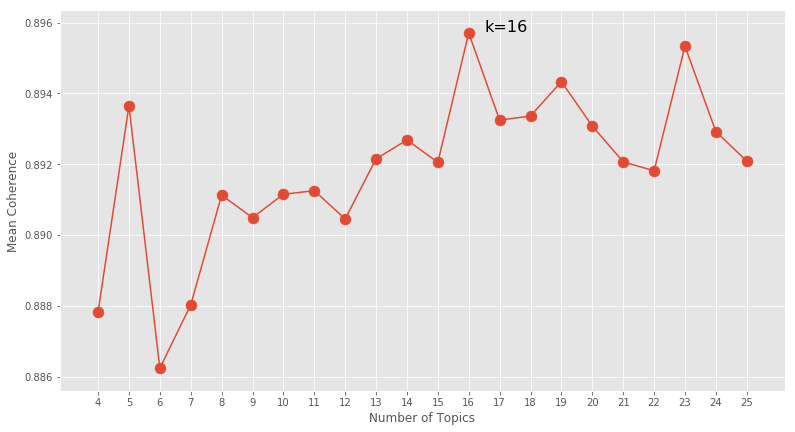

In [25]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( kp_k_values, kp_coherences )
plt.xticks(kp_k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( kp_k_values, kp_coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(kp_coherences)
xpos = kp_coherences.index(ymax)
kp_best_k = kp_k_values[xpos]
plt.annotate( "k=%d" % kp_best_k, xy=(kp_best_k, ymax), xytext=(kp_best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

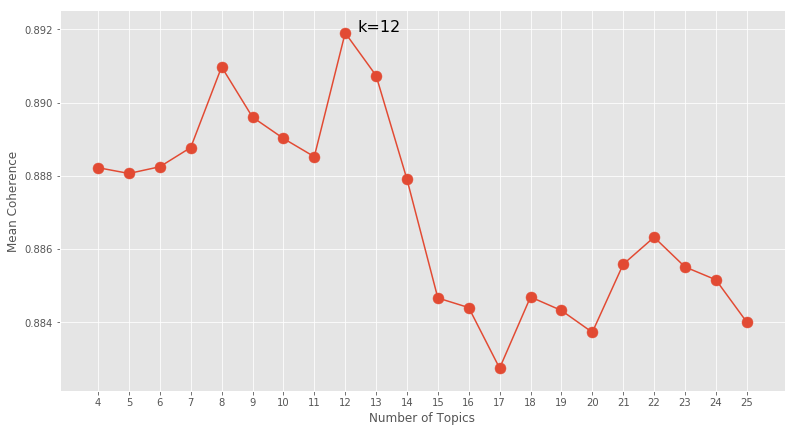

In [26]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( yao_k_values, yao_coherences )
plt.xticks(yao_k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( yao_k_values, yao_coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(yao_coherences)
xpos = yao_coherences.index(ymax)
yao_best_k = yao_k_values[xpos]
plt.annotate( "k=%d" % yao_best_k, xy=(yao_best_k, ymax), xytext=(yao_best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

## Examine the Final Model

In [33]:
kp_k = kp_best_k
# get the model that we generated earlier.
kp_W = kp_topic_models[kp_k-kmin][1]
kp_H = kp_topic_models[kp_k-kmin][2]
for topic_index in range(kp_k):
    descriptor = get_descriptor( tf_kp_posts_feature_names, kp_H, topic_index, 20 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: 公民, 參與, 顧問, 報名, 開放, 全民, 市民, 政府, 委員會, 顧問團, 台北市, 咖啡館, 預算, 希望, 公開, 廣場, 討論, 網路, 歡迎, 透明
Topic 02: 世大運, 比賽, 臺灣, 回家, 選手, 世界, 這次, 加油, 臺北, 一起, 倒數, 賽事, 台灣, 場館, 運動, 看見, 志工, 開幕, 國際, 主場
Topic 03: 台北, 專輯, 片花, 一分鐘, 限量, 募款, 獲贈, 專案, 即可, 一張, 線上, 捐款, 入場, 簽唱會, 音樂, 樂團, 乙張, 柯p, 香港, 天晴
Topic 04: 城市, 臺北, 設計, 文化, 臺灣, 一個, 發展, 成為, 世界, 產業, 價值, 藝術, 台北, 光榮, 國際, 公園, 多元, 進步, 臺北市, 創意
Topic 05: 教育, 孩子, 老師, 學生, 學校, 實驗, 學習, 國小, 平等, 機會, 動物, 田園, 家長, 課程, 小朋友, 台北市, 高中, 應該, 教育局, 酷課
Topic 06: 防災, 颱風, 臺北市, 市民, 政府, 資訊, 演習, 災害, 朋友, 停止, 台北市, 安全, 民眾, 中央, 上班, 中心, 相關, 上課, 應變, 市府
Topic 07: 新政, 柯p, 捐款, 柯語錄, 支持, 柯文哲, 逐字, 智慧, 辯論, 創造, 一定, 打敗, 號碼, 交換, 速度, 遠大, 申論, 答案, 不一定, 團結
Topic 08: 台灣, 改變, 選舉, 政治, 柯文哲, 文化, 相信, 市民, 社會, 民主, 一個, 台北, 一場, 歷史, 自由, 首都, 擁抱, 朋友, 支持, 運動
Topic 09: 問題, 解決, 大巨蛋, 安全, 面對, 社子島, 一個, 市府, 政府, 公安, 遠雄, 處理, 食安, 北市府, 提出, 改善, 已經, 堅持, 第一步, 過去
Topic 10: 公車, 幹線, 捷運, 交通, 運輸, 路線, 路網, 吃到飽, 定期票, 公共, 綠色, 調整, 內湖, 八橫八縱, 改善, 搭乘, 大眾, 增加, 班次, 上路
Topic 11: 市場, 改建, 傳統, 環南, 東門, 美食, 攤商, 開工, 城市, 果菜, 生活, 縮影, 大龍, 老舊, 好壞, 廁所, 批發, 改建案, 職人

In [35]:
yao_k = yao_best_k
# get the model that we generated earlier.
yao_W = yao_topic_models[yao_k-kmin][1]
yao_H = yao_topic_models[yao_k-kmin][2]
for topic_index in range(yao_k):
    descriptor = get_descriptor( tf_yao_posts_feature_names, yao_H, topic_index, 20 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: 民調, 支持, 電話, 台北市長, 唯一, 民進黨, 姚文智, 階段, 好友, 提名, 市長, 爭取, 參選, 候選人, 第一, 政見, 市政, 顧立雄, 人選, 感謝
Topic 02: 機場, 松山, 桃園, 廢除, 松機, 跑道, 遷移, 桃機, 發展, 航廈, 離島, 捷運, 第三, 問題, 空域, 公頃, 台北, 起降, 居民, 完工
Topic 03: 城市, 台北, 論壇, 國際, 未來, 改造, 願景, 翻轉, 張基義, 邀請, 發展, 美學, 創新, 錄影, 矽谷, 開放, 月場, 邀請到, 需要, 地殼
Topic 04: 都市, 條例, 再生, 住宅, 更新, 公辦, 推動, 政府, 老舊, 特別, 社會, 加速, 建築物, 公共, 修法, 改造, 重建, 萬戶, 提出, 發展
Topic 05: 台灣, 價值, 遊行, 首都, 一起, 民主, 國家, 史明, 朋友, 市長, 夢想, 站出來, 民進黨, 守護, 今天, 自由, 相信, 東京, 進行式, 一個
Topic 06: 蔡英文, 小英, 總部, 競選, 姚文智, 成立, 過半, 大會, 國會, 聯合, 承德路, 點亮, 下午, 最後, 地點, 邀請, 時間, 到場, 星期日, 一起
Topic 07: 公園, 中央, 活動, 創意, 台北, 公頃, 松機, 紐約, 想像, 報名, 官網, 河濱, 改變, 一座, 綠地, 未來, 城市, 截止, 這一, 擁有
Topic 08: 內湖, 交通, 創意, 報名, 問題, 競賽, 朋友, 活動, 狀況, 論壇, 右岸, 解決, 解開, 柯市長, 通勤, 公車, 智慧, 紓解, 提供, 更多
Topic 09: 故宮, 漫畫, 國寶, 鍾孟舜, 紀念堂, 中正, 計畫, 藝術, 鄭問, 轉型, 雙溪, 銅像, 鄭植羽, 正義, 院長, 展出, 漫畫家, 工會, 蔣介石, 反對
Topic 10: 姚文智, 台北, 市政, 鎖定, 翻轉, 一起, 民視, 分享, 下午, 政見, 辯論會, 加入, 城區, 市長, 西區, 藍圖, 廢除, 快樂, 公辦, 好友
Topic 11: 食安, 食品, 安全, 食農, 飲食, 教育法, 環境, 食物, 建構, 提出, 健康, 教育, 回收法, 三法, 姚文智, 出發, 管理法, 安心, 

## Exporting the Results

In [38]:
joblib.dump((kp_W,kp_H,kp_k), "result/kp_nmf.pk")

['result/kp_nmf.pk']

In [39]:
joblib.dump((yao_W,yao_H,yao_k), "result/kp_nmf.pk")

['result/kp_nmf.pk']